In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

import math

from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/BSE.csv')
df.Close = df.Close.interpolate()

In [ ]:
df.Close.isnull().sum()

0

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-12-20,19770.019531,20006.160156,19711.119141,19888.880859,19888.880859,11200.0
1,2010-12-21,19925.759766,20090.839844,19925.759766,20060.320313,20060.320313,14200.0
2,2010-12-22,20118.820313,20151.250000,19931.310547,20015.800781,20015.800781,12000.0
3,2010-12-23,20038.830078,20076.080078,19939.300781,19982.880859,19982.880859,7600.0
4,2010-12-24,19911.460938,20086.419922,19880.359375,20073.660156,20073.660156,16400.0


In [ ]:
df.reset_index()['Close']

0       19888.880859
1       20060.320313
2       20015.800781
3       19982.880859
4       20073.660156
            ...     
2464    45959.878906
2465    46099.011719
2466    46253.460938
2467    46263.171875
2468    46666.460938
Name: Close, Length: 2469, dtype: float64

In [ ]:
df1 = df.reset_index()['Close']
df1.head()
type(df1)

pandas.core.series.Series

In [ ]:
df1.shape

(2469,)

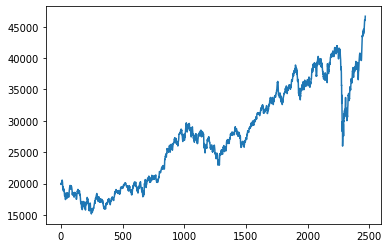

In [ ]:
plt.plot(df1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
training_size = int(len(df1)*0.65)
test_size = int(len(df1)) - training_size
train_data = df1[0:training_size,:]
test_data = df1[training_size:len(df1),:]

KeyError: ignored

In [ ]:
train_data.shape

(1604, 1)

In [ ]:
test_data.shape

(865, 1)

In [ ]:
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i+time_step, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
X_train

array([[0.14968543, 0.15512944, 0.15371573, ..., 0.10827981, 0.10036743,
        0.10657517],
       [0.15512944, 0.15371573, 0.15267037, ..., 0.10036743, 0.10657517,
        0.10066085],
       [0.15371573, 0.15267037, 0.15555304, ..., 0.10657517, 0.10066085,
        0.09406604],
       ...,
       [0.38305657, 0.38464778, 0.38298035, ..., 0.51113031, 0.50929108,
        0.51083757],
       [0.38464778, 0.38298035, 0.38367833, ..., 0.50929108, 0.51083757,
        0.50555481],
       [0.38298035, 0.38367833, 0.38529652, ..., 0.51083757, 0.50555481,
        0.50580221]])

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=100, batch_size=64, verbose=1
          )

Epoch 1/100
24/24 [==============================] - 10s 215ms/step - loss: 0.0245 - val_loss: 0.0035
Epoch 2/100
24/24 [==============================] - 4s 172ms/step - loss: 9.7355e-04 - val_loss: 0.0029
Epoch 3/100
24/24 [==============================] - 4s 171ms/step - loss: 4.8582e-04 - val_loss: 0.0026
Epoch 4/100
24/24 [==============================] - 4s 172ms/step - loss: 4.1087e-04 - val_loss: 0.0027
Epoch 5/100
24/24 [==============================] - 5s 198ms/step - loss: 4.4166e-04 - val_loss: 0.0023
Epoch 6/100
24/24 [==============================] - 4s 181ms/step - loss: 4.2716e-04 - val_loss: 0.0026
Epoch 7/100
24/24 [==============================] - 4s 175ms/step - loss: 4.0081e-04 - val_loss: 0.0027
Epoch 8/100
24/24 [==============================] - 4s 173ms/step - loss: 3.8837e-04 - val_loss: 0.0021
Epoch 9/100
24/24 [==============================] - 4s 176ms/step - loss: 3.8264e-04 - val_loss: 0.0025
Epoch 10/100
24/24 [==============================] - 4s 1

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
math.sqrt(mean_squared_error(y_train, train_predict))

23462.054664834868

In [ ]:
math.sqrt(mean_squared_error(y_test, test_predict))

37040.45457180425

In [ ]:
a = np.empty_like(df1)
a[:,:] = np.nan
a[100:len(train_predict)+100,:] = train_predict


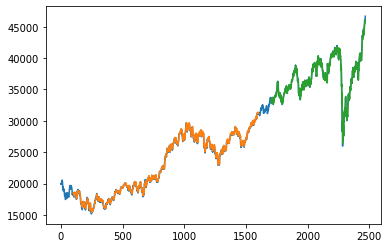

In [ ]:
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

865

In [ ]:
x_input = test_data[765:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
lst_output = []
n_steps = 100
i = 0
while(i<30):
  if(len(temp_input)>100):
    x_input = np.array(temp_input[1:])
    print('{} day input {}'.format(i, x_input))
    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape((1,n_steps,1))
    yhat = model.predict(x_input, verbose=0)
    print('{} dayoutput {}'.format(i, yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]

    lst_output.extend(yhat.tolist())
    i += 1

  else:
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i += 1
  
print(lst_output)

[0.99815524]
101
1 day input [0.72705763 0.71641794 0.71231588 0.6911263  0.71488863 0.71410803
 0.72560709 0.72608725 0.73058079 0.7377235  0.73653642 0.73465842
 0.72090392 0.7264115  0.74157562 0.74432141 0.7317974  0.73860333
 0.75017346 0.75159609 0.75890104 0.76015684 0.77139293 0.7447501
 0.75340363 0.75928557 0.75626602 0.7361411  0.73804799 0.73640059
 0.73095689 0.75148309 0.75193498 0.74882549 0.75796205 0.76617064
 0.75591387 0.75165774 0.72588308 0.71635468 0.71426978 0.67886898
 0.70538603 0.72421559 0.72394852 0.72695604 0.74693361 0.7557185
 0.77479899 0.78446446 0.79410909 0.80448705 0.80716437 0.80817135
 0.81354509 0.77968414 0.78776795 0.80201378 0.80559475 0.81076878
 0.80604303 0.81007626 0.79292871 0.80488758 0.78584616 0.780365
 0.77605331 0.78061036 0.79660047 0.80787377 0.83086481 0.84842194
 0.87078905 0.89238921 0.90242444 0.89491507 0.8976399  0.90573276
 0.91382563 0.92104474 0.90262415 0.91158816 0.91777711 0.93193562
 0.90986869 0.92357519 0.92008156 0.9

In [ ]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [ ]:
len(df1)

2469

In [ ]:
df3 = df1.tolist()
df3.extend(lst_output)

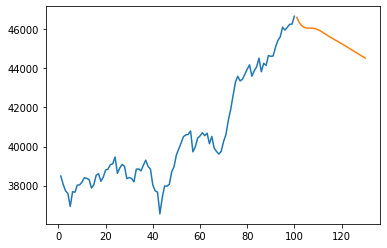

In [ ]:
plt.plot(day_new, scaler.inverse_transform(df1[2369:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

In [ ]:
scaler.inverse_transform(lst_output)

array([[46608.36677997],
       [46359.24701733],
       [46196.09910044],
       [46106.95319261],
       [46067.24081453],
       [46057.84438949],
       [46058.05461714],
       [46050.37943096],
       [46024.71476463],
       [45978.73685184],
       [45915.91444877],
       [45842.47179541],
       [45764.75326187],
       [45687.44204439],
       [45612.96139203],
       [45541.64353954],
       [45472.54058549],
       [45404.17718227],
       [45335.22063676],
       [45264.85068572],
       [45192.81768383],
       [45119.36939938],
       [45045.01638523],
       [44970.30861193],
       [44895.68155102],
       [44821.41675741],
       [44747.59682051],
       [44674.20484703],
       [44601.14698536],
       [44528.32750682]])